# ALEngagementZones
___
## What it does
___
: ALEngagementZones는 로봇과 engagement 영역 개념관점을 가진 공간에서의 위치를 사용하여, detected된 사람 및/또는 동작을 분류 할 수 있습니다.

### Concept of engagement zones
: 이 로봇 앞의 공간은 configurable(구성가능한)한 영역으로 나누어진다. 그러므로, 사람 혹은 움직임이 detected된 영역에 따라 로봇의 동작을 조정할 수 있다.



## How it works
___
### Zone definition 
: Engagement zones 는 다음의 파라미터들로 정의된어진다. 

> FirstDistance // "near" // ALEngagementZonesProxy::setFirstLimitDistance

> SecondDistance // "farther" //  ALEngagementZonesProxy::setSecondLimitDistance

> LimitAngle // "in front" //  	ALEngagementZonesProxy::setLimitAngle

=> 위 파라미터들을 통해 3가지 영역이 추론된다.

    1. Zone1 : near, 로봇 바로 앞
    2. Zone2 : Zone1보다 훨씬 앞쪽도 있고 옆면에도 있지만 근처이다.
    3. Zone3 : 멀리 떨어져 있으며, SecondDistance를 넘어선 "매우먼" 곳
    
    <Default values> :
    
    1. FirstDistance = 1.5m
    2. SecondDistance = 2.5m 
    3. LimitAngle = 90도
    
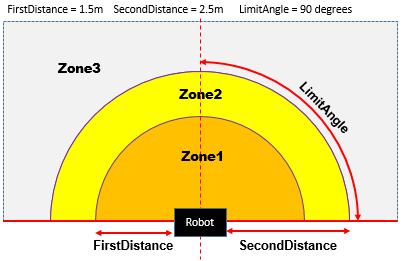

    <Other example>

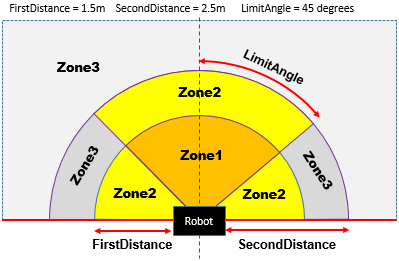

## Getting started
___ 
: ALEngagementZones는 ALEngagementZonesProxy::computeEngagementZone을 사용하여, 해당 object에 대한 FRAME_ROBOT에서의 위치에서 그 object의 engagement 영역을 계산할 수 있게 한다.

: ALEngagementZones는 다른 module들과 공동으로 사용되어질 수 있다. 

> 1. EngagementZones with PeoplePerception

> 2. EngagementZones with MovementDetection.

: 또한 Choregraphe에서, Robot view는 engagement 영역을 보여주고, ALPeoplePerception을 통해 detected된 사람들 또한 보여준다.

## UseCases
___

### 1. EngagementZones with PeoplePerception
___
: ALEngagementZones module은 ALPeoplePerception module에 의해 detected된 무리중에 각 개인에 대한 참여영역을 계산하는 데 사용될 수 있다.

> Warning : 위와 같은 경우는, ALPeoplePerception을 subscribe 했을때만 작동된다.

: 각 개인의 Engagement 영역은 key(PeoplePerception/Person/<ID>/EngagementZone)를 채움으로  ALMemory에 있는 그 사람의 description에 추가 된다.
    
: 그런 후 사람들은 각자의 engagement 영역에 따라 분류되어진다. memory key들인 (EngagementZones/PeopleInZone1, EngagementZones/PeopleInZone2, EngagementZones/PeopleInZone3)은 각 영역 에 있는 사람들의 ID list를 저장한다. 이 list 중 적어도 하나가 업데이트 될 때마다 EngagementZones/ PeopleInZonesUpdated()가 유발된다.

> 1. 사람이 어떠한 한 영역에서 가까이 움직일 경우, 이벤트인  EngagementZones/PersonApproached()가 유발된다.

> 2. 사람이 어떠한 한 영역에서 더 멀리 움직일 경우, 이벤트인  EngagementZones/PersonMoveAway()가 유발된다.

: 사람들이 특정 영역에 들어갈때 일부 동작을 trigger 할 수 있도록 하면, 동시에, 어떠한 사람이 한 영역을 떠나 다른 영역으로 들어갈때 이벤트인 EngagementZones/PersonEnteredZone1(), EngagementZones/PersonEnteredZone2(), EngagementZones/PersonEnteredZone3() 들이 유발된다.


### 2. EngagementZones with MovementDetection
___
: ALEngagementZones module 은 ALMovementDetection module에 의해 detected된 무리중에 각 개인에 대한 참여영역을 계산하는 데 사용될 수 있다.

> Warning : 위와 같은 경우는, ALMovementDetection을 subscribe 했을때만 작동된다.

: 사람들은 engagement 영역에 따라 분류되어진다. memory key 인 (EngagementZones/LastMovementsInZone1, EngagementZones/LastMovementsInZone2 and EngagementZones/LastMovementsInZone3)들은 각 영역에서의 움직임들에 한 list를 저장한다. 이 movement list들은 memory key인 movementDetection/MovementInfo 와 정확히 같은 구조를 가지고 있고, ALMovementDetection에 서술되어있다. 이 list 중 적어도 하나가 업데이트 될 때마다 EngagementZones/MovementsInZonesUpdated()가 유발된다.

: 움직임이 detected되지 않는다면, 이벤트인 EngagementZones/MovementsInZonesUpdated()가 유발되지 않고 이전 memory key들의 movement list들이 동일하게 유지된다. 

> Warning : 만약, 3D sensor가 구비되어 있지 않는 로봇의 경우, 로봇의 관점에서 움직임의 거리를 detect하여 로봇이 속한 영역을 결정하는 방법은 불가능하다. 그러므로 움직임들은 전부  (EngagementZones/LastMovementsInZone1, EngagementZones/LastMovementsInZone2 and EngagementZones/LastMovementsInZone3) 의 각 memory key들에 저장된다.